In [1]:
import os
import glob
from pathlib import Path
import datetime

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = {"date": [], "paper_title": []}
for path in glob.glob(os.path.join("..", "**/summary.md"), recursive=True):
    path = Path(path)
    create_date = datetime.datetime.fromtimestamp(path.stat().st_ctime)    
    df["paper_title"].append(path.parent.name)
    df["date"].append(create_date)
df = pd.DataFrame(df)
df.sort_values("date", inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()


,date,paper_title
0,2022-03-29 23:10:31.244834,Exploring the Limits of Transfer Learning with...
1,2022-03-29 23:10:42.674834,Vocabulary Learning via Optimal Transport for ...
2,2022-03-31 01:04:06.668251,Including Signed Languages in Natural Language...
3,2022-04-01 22:20:51.686251,UnNatural Language Inference
4,2022-04-06 11:46:21.311437,Named Entity Recognition with Small Strongly L...


In [3]:
df_week = {"date": [], "num_of_papers": []}
for idx, subdf in df.groupby(pd.Grouper(key='date', freq='W-SUN')):
    if len(subdf) > 0:
        print(idx - datetime.timedelta(days=7), idx, subdf.iloc[0]["date"], subdf.iloc[-1]["date"])
    else:
        print(idx - datetime.timedelta(days=7), idx)
    df_week["date"].append(idx)
    df_week["num_of_papers"].append(len(subdf))
df_week = pd.DataFrame(df_week)
df_week.sort_values("date", inplace=True)
df_week.reset_index(drop=True, inplace=True)
df_week.head()


2022-03-27 00:00:00 2022-04-03 00:00:00 2022-03-29 23:10:31.244834 2022-04-01 22:20:51.686251
2022-04-03 00:00:00 2022-04-10 00:00:00 2022-04-06 11:46:21.311437 2022-04-08 23:35:51.422273
2022-04-10 00:00:00 2022-04-17 00:00:00 2022-04-11 21:33:45.349485 2022-04-17 23:30:37.356818
2022-04-17 00:00:00 2022-04-24 00:00:00 2022-04-19 23:32:42.014869 2022-04-21 22:02:12.442596
2022-04-24 00:00:00 2022-05-01 00:00:00 2022-04-27 12:45:53.984304 2022-04-29 12:25:16.887457
2022-05-01 00:00:00 2022-05-08 00:00:00
2022-05-08 00:00:00 2022-05-15 00:00:00 2022-05-11 21:47:18.698221 2022-05-14 13:33:26.916925
2022-05-15 00:00:00 2022-05-22 00:00:00 2022-05-18 11:49:46.886471 2022-05-18 21:06:31.497682
2022-05-22 00:00:00 2022-05-29 00:00:00 2022-05-25 12:56:04.364919 2022-05-25 12:58:04.354919
2022-05-29 00:00:00 2022-06-05 00:00:00 2022-05-30 20:58:14.301675 2022-06-01 19:06:11.601676
2022-06-05 00:00:00 2022-06-12 00:00:00 2022-06-07 11:46:21.480866 2022-06-10 13:46:01.980866
2022-06-12 00:00:00 

,date,num_of_papers
0,2022-04-03,4
1,2022-04-10,7
2,2022-04-17,7
3,2022-04-24,3
4,2022-05-01,2


In [4]:
df_week["num_of_papers(cm)"] = df_week["num_of_papers"].cumsum()
df_week["paper/day"] = df_week["num_of_papers"] / 7.
df_week["paper/day(ma)"] = df_week["paper/day"].rolling(3, min_periods=1).mean()
df_week["paper/day(ma)(diff1)"] = df_week["paper/day(ma)"].diff(1)
df_week["paper/day(ma)(diff2)"] = df_week["paper/day(ma)(diff1)"].diff(1)
df_week.head()


,date,num_of_papers,num_of_papers(cm),paper/day,paper/day(ma),paper/day(ma)(diff1),paper/day(ma)(diff2)
0,2022-04-03,4,4,0.571429,0.571429,NaN,NaN
1,2022-04-10,7,11,1.000000,0.785714,0.214286,NaN
2,2022-04-17,7,18,1.000000,0.857143,0.071429,-0.142857
3,2022-04-24,3,21,0.428571,0.809524,-0.047619,-0.119048
4,2022-05-01,2,23,0.285714,0.571429,-0.238095,-0.190476


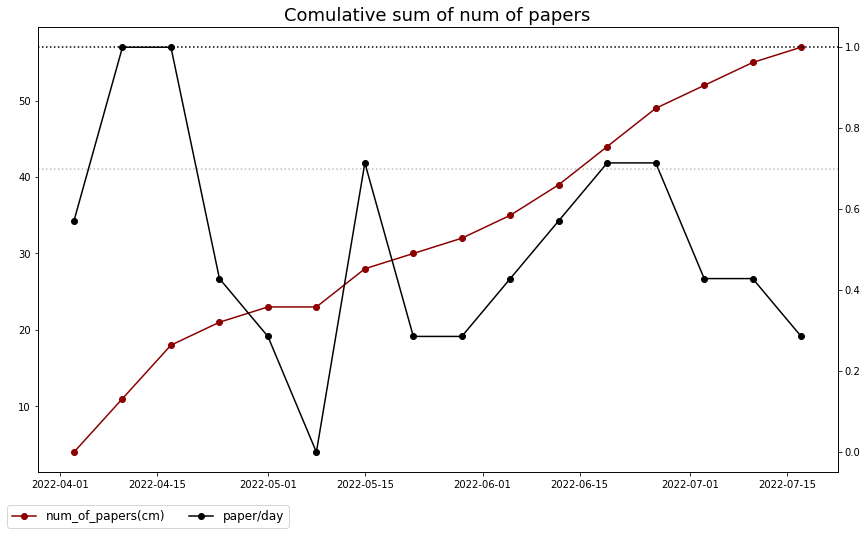

In [5]:
fig, axs = plt.subplots(figsize=(12, 7))
twn = axs.twinx()
axs.plot(df_week["date"], df_week["num_of_papers(cm)"], marker="o", color="darkred", label="num_of_papers(cm)")
twn.plot(df_week["date"], df_week["paper/day"], marker="o", color="black", label="paper/day")
twn.axhline(y=1.0, color="black", linestyle="dotted")
twn.axhline(y=0.7, color="gray", linestyle="dotted", alpha=0.5)
axs.set_title("Comulative sum of num of papers", fontsize=12*1.5)
fig.legend(bbox_to_anchor=(0, -0.01), loc='upper left', borderaxespad=0, fontsize=12, ncol=3)
fig.tight_layout()
fig.savefig("img/Comulative_sum_of_num_of_papers.png", bbox_inches='tight')


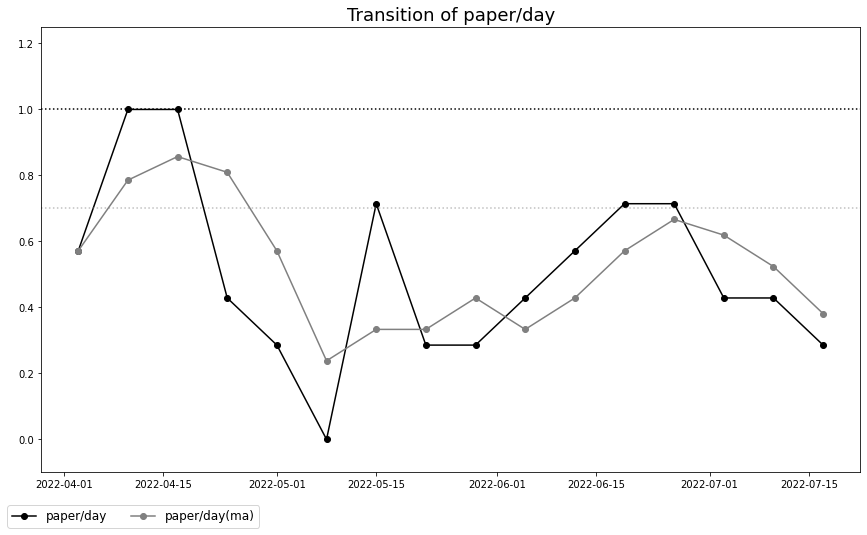

In [6]:
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(df_week["date"], df_week["paper/day"], marker="o", color="black", label="paper/day")
axs.plot(df_week["date"], df_week["paper/day(ma)"], marker="o", color="gray", label="paper/day(ma)")
axs.axhline(y=1.0, color="black", linestyle="dotted")
axs.axhline(y=0.7, color="gray", linestyle="dotted", alpha=0.5)
axs.set_title("Transition of paper/day", fontsize=12*1.5)
axs.set_ylim([-0.1, 1.25])
fig.legend(bbox_to_anchor=(0, -0.01), loc='upper left', borderaxespad=0, fontsize=12, ncol=3)
fig.tight_layout()
fig.savefig("img/Transition_of_paper_day1.png", bbox_inches='tight')


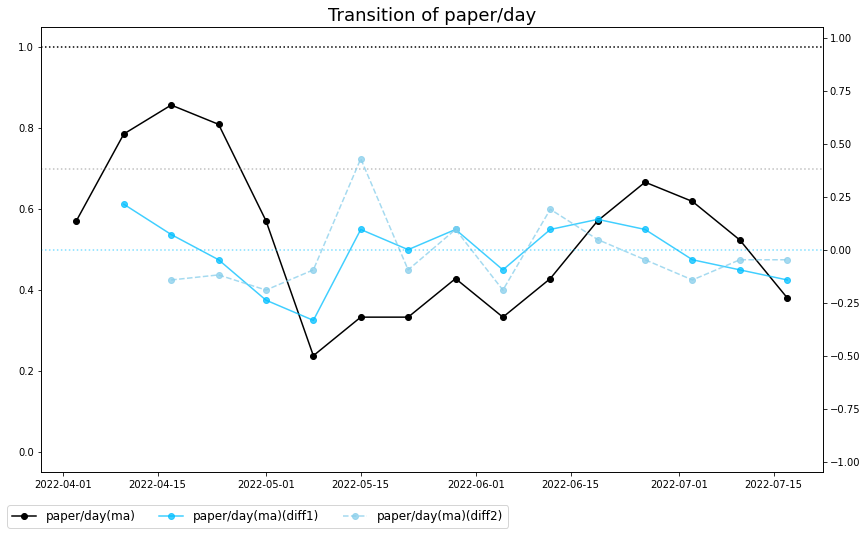

In [7]:
fig, axs = plt.subplots(figsize=(12, 7))
twn = axs.twinx()
axs.plot(df_week["date"], df_week["paper/day(ma)"], marker="o", color="black", label="paper/day(ma)")
axs.axhline(y=1.0, color="black", linestyle="dotted")
axs.axhline(y=0.7, color="gray", linestyle="dotted", alpha=0.5)
twn.plot(df_week["date"], df_week["paper/day(ma)(diff1)"], marker="o", color="deepskyblue", alpha=0.75, label="paper/day(ma)(diff1)")
twn.plot(df_week["date"], df_week["paper/day(ma)(diff2)"], marker="o", color="skyblue", linestyle="dashed", alpha=0.75, label="paper/day(ma)(diff2)")
twn.axhline(y=0.0, color="deepskyblue", linestyle="dotted", alpha=0.5)
axs.set_title("Transition of paper/day", fontsize=12*1.5)
axs.set_ylim([-0.05, 1.05])
twn.set_ylim([-1.05, 1.05])
fig.legend(bbox_to_anchor=(0, -0.01), loc='upper left', borderaxespad=0, fontsize=12, ncol=3)
fig.tight_layout()
fig.savefig("img/Transition_of_paper_day2.png", bbox_inches='tight')


In [8]:
df.to_csv("df.csv", index=False)


In [9]:
df_week.to_csv("df_week.csv", index=False)
